In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Diwali_Sales_Data.csv",encoding="unicode_escape")
df.shape

(11251, 15)

In [3]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#Here I have dropped the empty column which can be seen clearly from the above info.
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [6]:
#Amount column have 12 null rows 
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.shape

(11251, 13)

In [8]:
# Dropped null value rows
df.dropna(inplace=True)
df.shape

(11239, 13)

In [9]:
# Change the amount column data type from float to integer
df["Amount"]=df["Amount"].astype("int")

In [10]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000



From the above information it can be seen that minimum(188) and maximum(11239) amount for which the order has been placed along
with the other information

# Exploratory Data Analysis

## Gender

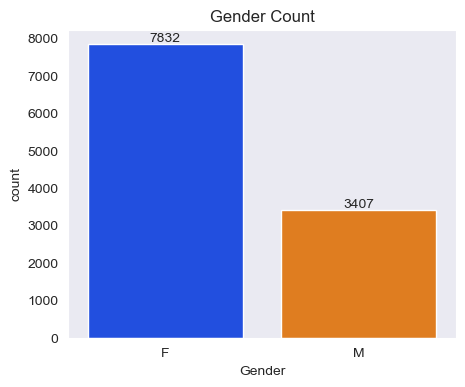

In [69]:
plt.figure(figsize=(5,4))
plt.title("Gender Count")
sns.set_style("dark")
sns.set_palette("bright")
ax=sns.countplot(x="Gender",data=df)
for count in ax.containers:
    ax.bar_label(count)

<AxesSubplot:title={'center':'Number of person of different age group '}, xlabel='Age Group', ylabel='count'>

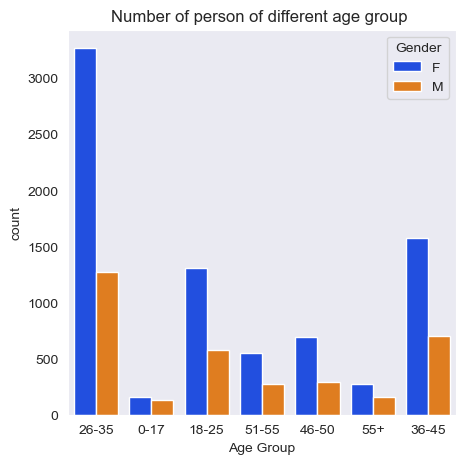

In [99]:
plt.figure(figsize=(5,5))
sns.set_style("dark")
plt.title("Number of person of different age group ")
sns.countplot(x="Age Group",hue='Gender',data=df)


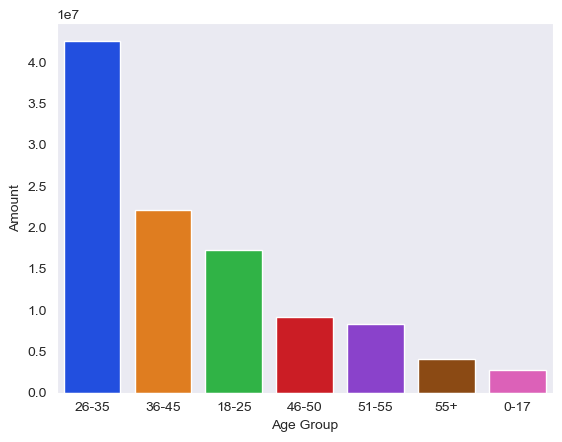

In [74]:
# Total amount VS Age group 
Age_Group =df.groupby(['Age Group'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=Age_Group)
plt.show()

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

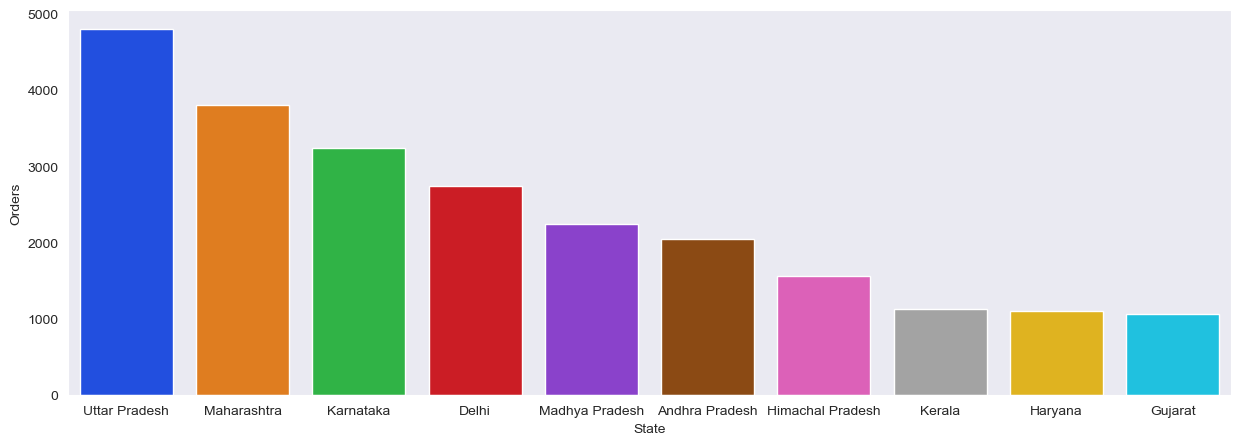

In [76]:
State_orders=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x="State",y="Orders",data=State_orders)
plt.show()

# Marital Status

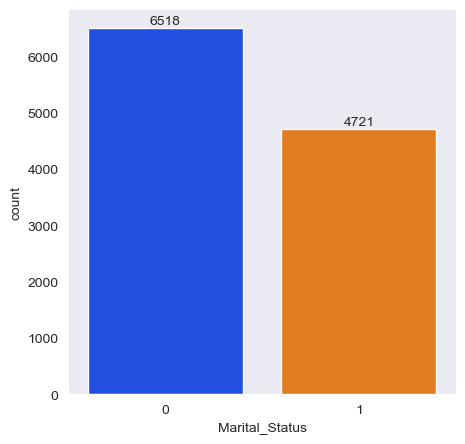

In [78]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Marital_Status",data=df)
for count in ax.containers:
    ax.bar_label(count)

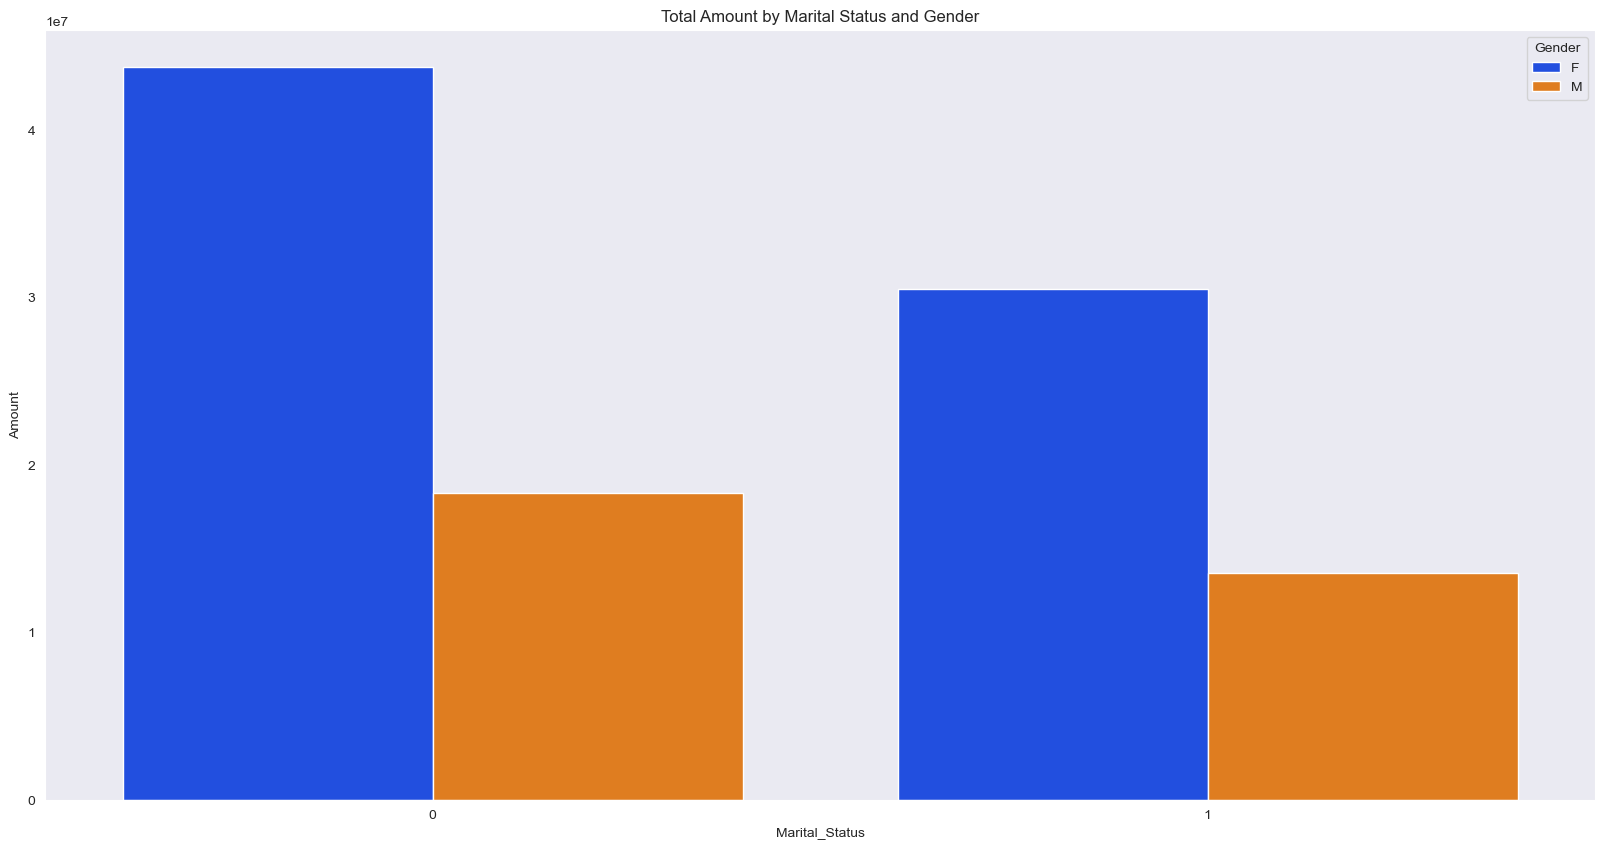

In [83]:
Marital_status=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
plt.figure(figsize=(20,10))
plt.title("Total Amount by Marital Status and Gender")
sns.barplot(x="Marital_Status",y="Amount",hue="Gender",data=Marital_status)
plt.show()

From above graph we can see that most of the buyers are married women so their purchasing power is high

# Occupation

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

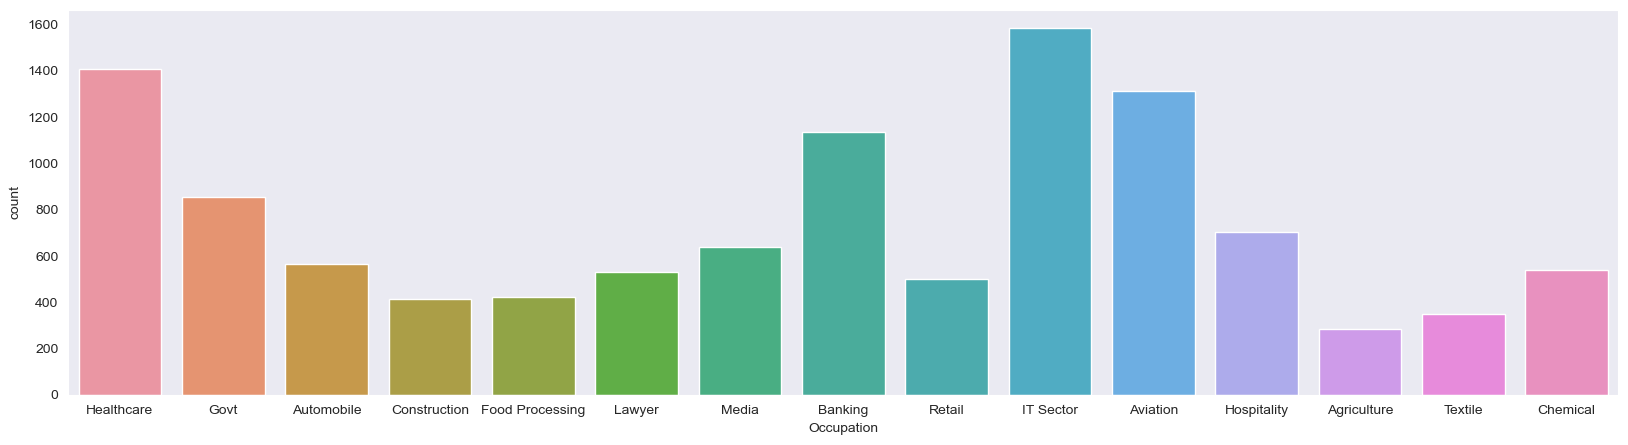

In [105]:
plt.figure(figsize=(20,5))
Sales_state=sns.countplot(data=df,x="Occupation")
for count in ax.containers:
    ax.bar_label(count)

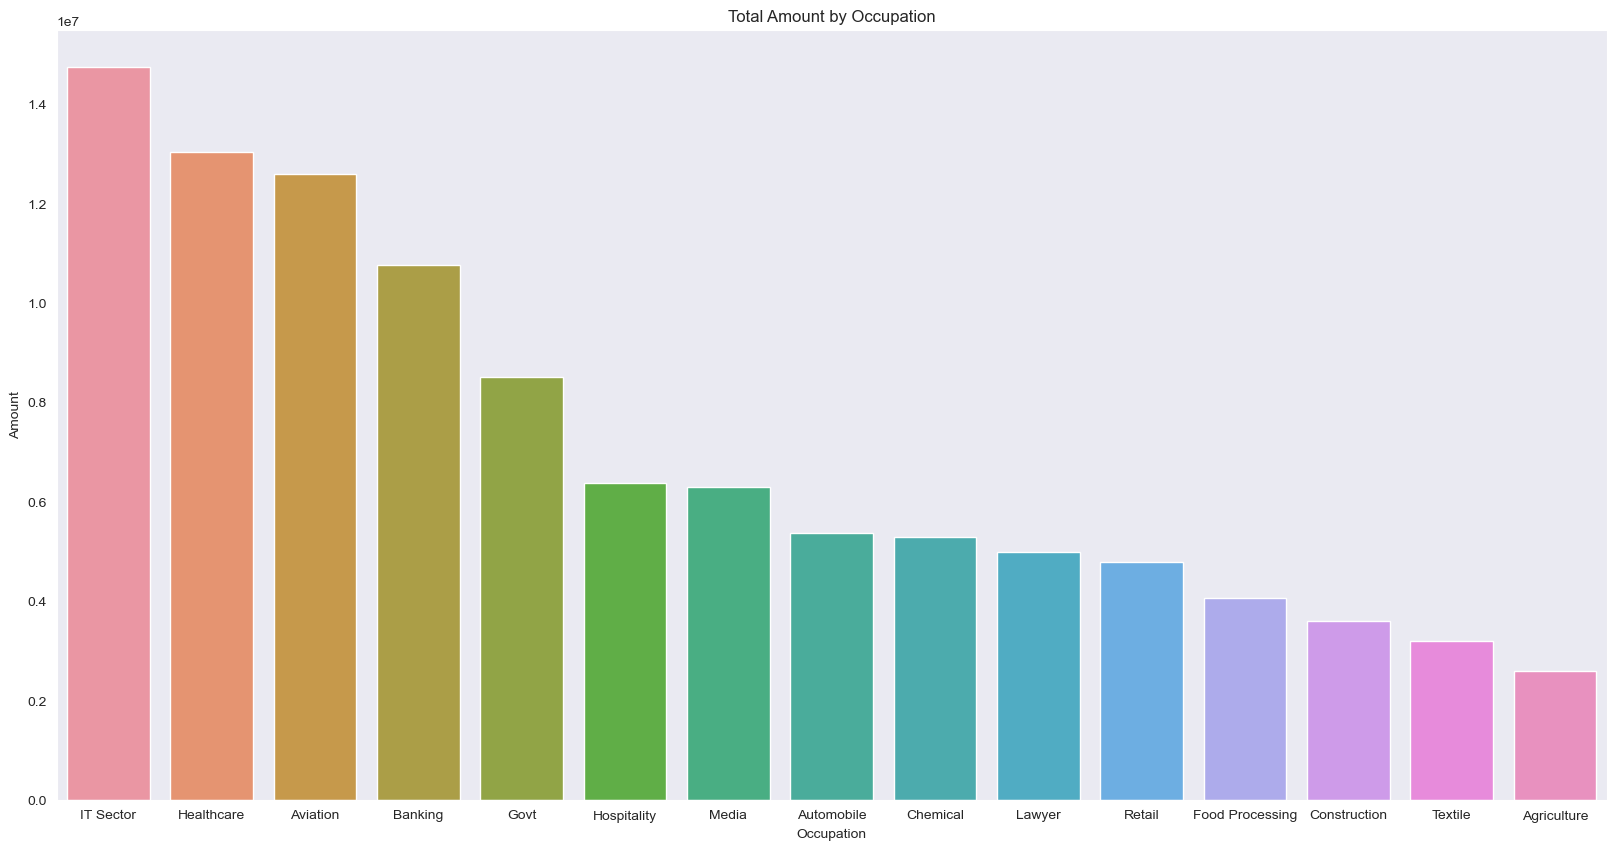

In [102]:
Sales_state=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
plt.figure(figsize=(20,10))
plt.title("Total Amount by Occupation")
sns.barplot(x="Occupation",y="Amount",data=Sales_state)
plt.show()

# Product

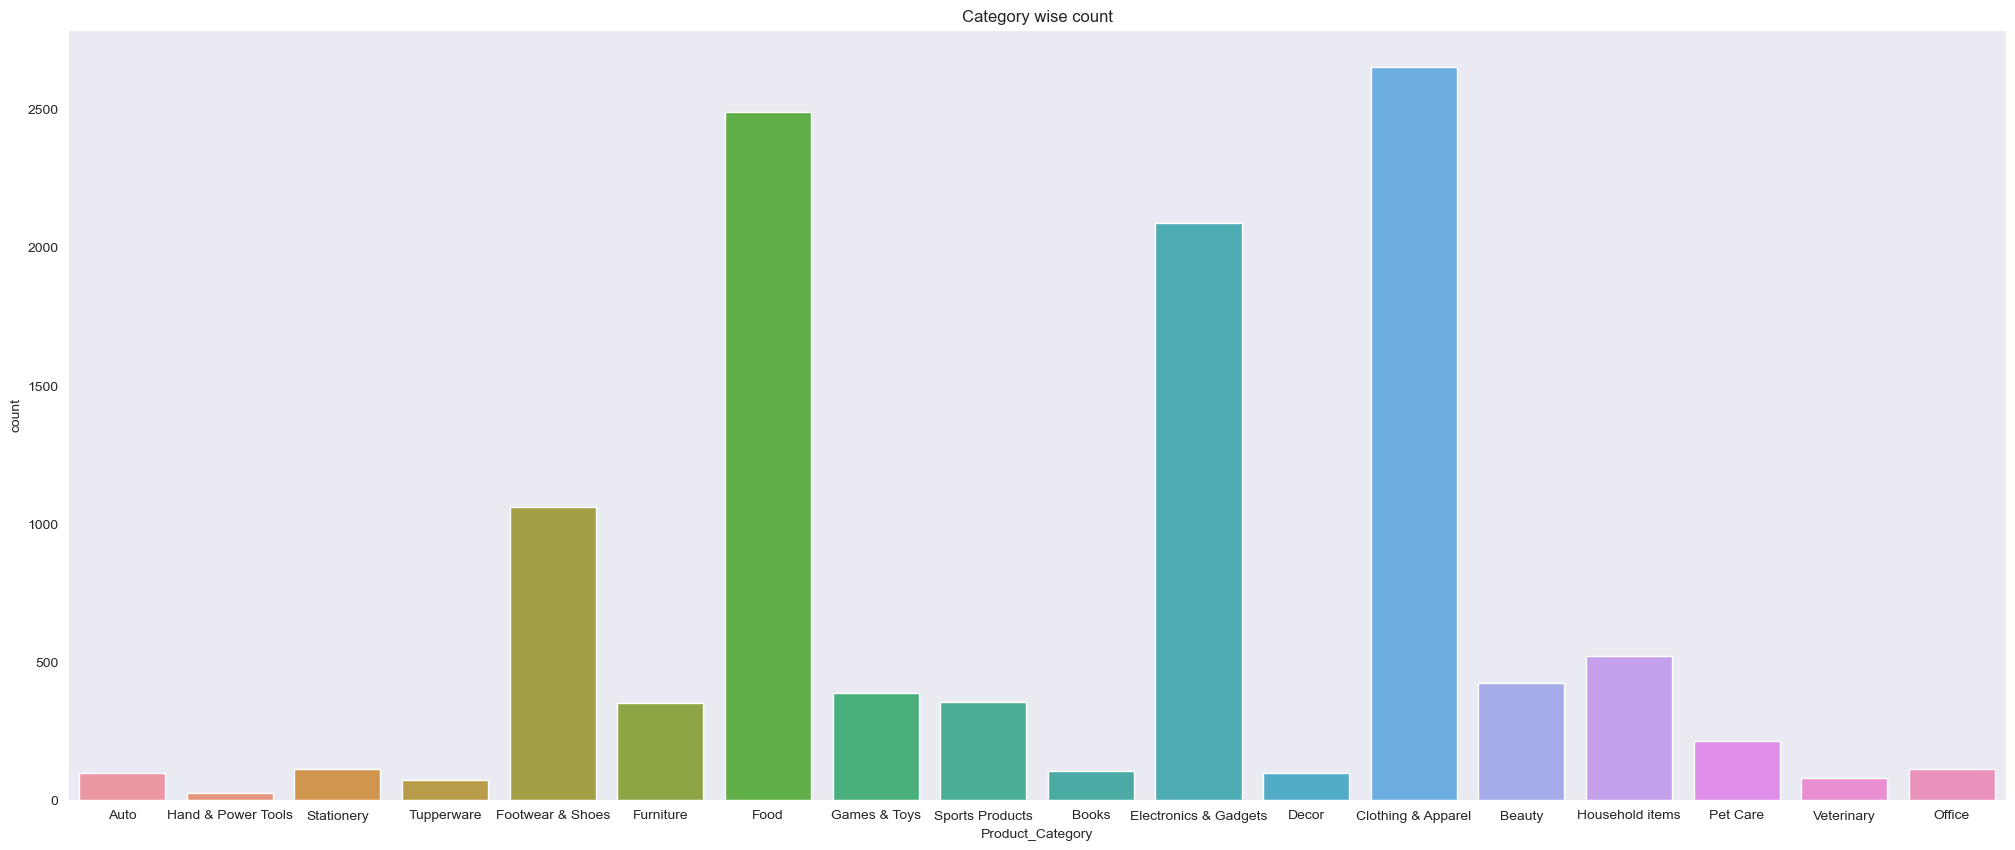

In [101]:
plt.figure(figsize=(25,10))
sns.countplot(x="Product_Category",data=df)
plt.title("Category wise count")
plt.show()

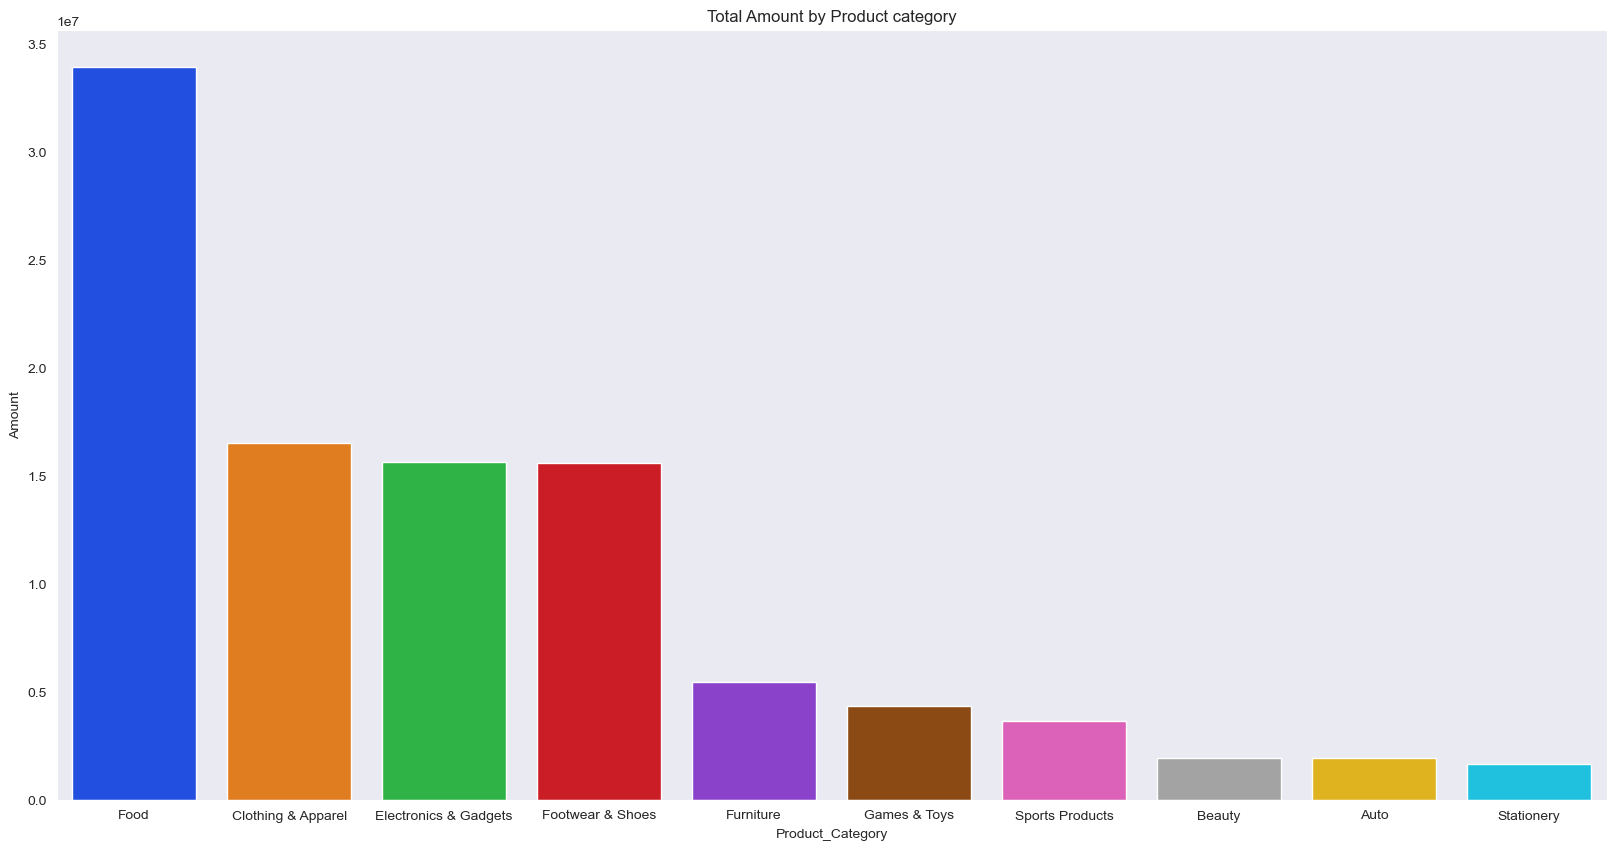

In [100]:
Sales_state=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.title("Total Amount by Product category")
sns.barplot(x="Product_Category",y="Amount",data=Sales_state)
plt.show()

# Conclusion
Married women of age group 26-35 years from UP,Maharastra,Karnatka working in IT, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category 